In [1]:
from ALMApy import run_alma, change_param, read_output
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})


In [2]:
m_neptune = 1.024e26
R_neptune = 24.6e6
rho_neptune = m_neptune/(4*np.pi/3*R_neptune**3)

R_jupiter = 69.9e6
rho_air = 1.293

print(rho_air*4*np.pi/3*(R_jupiter**3-R_neptune**2))

1.8497739567307467e+24


In [3]:
t_nep, k_nep = run_alma(R_neptune, rho_neptune, 1.46e11, 1e21, "maxwell")

Running ALMA3...


Done running!


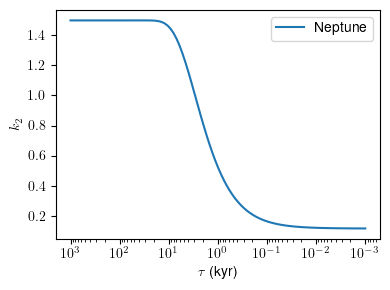

In [4]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(t_nep,k_nep,label=r"Neptune")
#ax.plot(t,k,label=r"$\rho_\oplus$")
#ax.plot(t_high_rho,k_high_rho,label=r"$2\rho_\oplus$")
ax.set_xscale("log")
ax.xaxis.set_inverted(True)
ax.set_xlabel(r"$\tau$ (kyr)")
ax.set_ylabel(r"$k_2$")
ax.legend()
fig.tight_layout()
plt.show()

In [ ]:
radii = [R_jupiter, R_neptune]
densities = [rho_air, rho_neptune]
rigidities = [1e-7,1.46e11]
viscosities =[3e-5,1e21]
models = ["newton", "maxwell"]

In [6]:
t_puff, k_puff = run_alma(radii, densities, rigidities, viscosities, models)

Running ALMA3...
Done running!


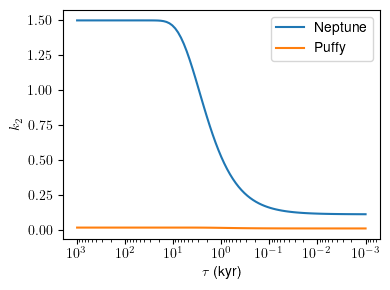

0.11445266 0.012820716


In [7]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(t_nep,k_nep,label=r"Neptune")
ax.plot(t_puff,k_puff,label=r"Puffy")
#ax.plot(t_high_rho,k_high_rho,label=r"$2\rho_\oplus$")
ax.set_xscale("log")
ax.xaxis.set_inverted(True)
ax.set_xlabel(r"$\tau$ (kyr)")
ax.set_ylabel(r"$k_2$")
ax.legend()
fig.tight_layout()
plt.show()

print(k_nep[0], k_puff[0])

### Solid core + varying atmosphere

In [8]:
N_steps = 10
atmosphere_radii = np.linspace(R_neptune, R_jupiter, N_steps)
data = []
for i,atm_radius in enumerate(atmosphere_radii):
    t,k = run_alma(radii = [atm_radius, R_neptune],
                   densities = [rho_air, rho_neptune],
                   rigidities = [1e-7,1.46e11],
                   viscosities = [3e-5,1e21],
                   model_types = ["newton", "maxwell"],
                   show_start_stop = False)
    
    data.append({"radius": atm_radius,
                 "t": t,
                 "k": k})

    print(f"{(i+1)/N_steps*100:.0f}% done")

10% done
20% done
30% done
40% done
50% done
60% done
70% done
80% done


KeyboardInterrupt: 

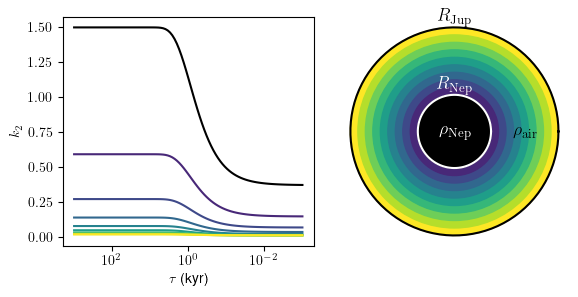

In [ ]:

# Setup colormap
norm = mcolors.Normalize(vmin=R_neptune, vmax=R_jupiter)
cmap = cm.viridis  # You can change this to any Matplotlib colormap
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, axes = plt.subplots(figsize=(6,3), ncols=2)
for i, model in enumerate(data):
    color = cmap(norm(model["radius"]))
    if i == 0: color = "black"
    # Plot love number
    axes[0].plot(model["t"],model["k"], color=color, label=f"$R={model["radius"]/R_jupiter:.2f}$"+ r"$R_\mathrm{Jup}$")

    # Show circle of radius`
    circle = plt.Circle((0,0),model["radius"]/R_jupiter, color=color, zorder=(len(data)-i)/10)
    axes[1].add_patch(circle)

axes[0].set_xscale("log")
axes[0].xaxis.set_inverted(True)
axes[0].set_xlabel(r"$\tau$ (kyr)")
axes[0].set_ylabel(r"$k_2$")

lims = 1.1
axes[1].set_xlim(-lims,lims)
axes[1].set_ylim(-lims,lims)
axes[1].set_aspect("equal")
axes[1].axis("off")

# Plot core
circle = plt.Circle((0,0),R_neptune/R_jupiter, color="black",zorder=10)
axes[1].add_patch(circle)

# Plot boundaries
phi = np.linspace(0,2*np.pi,100)
axes[1].plot(R_neptune/R_jupiter*np.cos(phi), R_neptune/R_jupiter*np.sin(phi), zorder=11, color='white')
axes[1].text(0, R_neptune/R_jupiter, r"$R_\mathrm{Nep}$", fontsize=13, ha="center", va="bottom", color="white")
axes[1].plot(np.cos(phi), np.sin(phi), color="black")
axes[1].text(0, 1, r"$R_\mathrm{Jup}$", fontsize=13, ha="center", va="bottom", color="black")
axes[1].text(0, 0, r"$\rho_\mathrm{Nep}$", fontsize=13, ha="center", va="center", zorder=12, color="white")
axes[1].text((R_neptune/R_jupiter+1)/2, 0, r"$\rho_\mathrm{air}$", fontsize=13, ha="center", va="center", zorder=12, color="black")

fig.tight_layout()
fig.savefig("figures/varying_atmosphere_solid_core.png", dpi=300)
plt.show()

In [9]:
change_param("time_points_minus_one", 2)

N_steps = 100
atmosphere_radii = np.linspace(R_neptune, R_jupiter, N_steps)
data_R1 = []
k2_values1 = np.zeros(N_steps)
for i,atm_radius in enumerate(atmosphere_radii):
    t,k = run_alma(radii = [atm_radius, R_neptune],
                   densities = [rho_air, rho_neptune],
                   rigidities = [1e-7,1.46e11],
                   viscosities = [3e-5,1e21],
                   model_types = ["newton", "maxwell"],
                   show_start_stop = False)
    
    data_R1.append({"radius": atm_radius,
                 "t": t,
                 "k": k})
    k2_values1[i] = k[0]
    print(f"{i/N_steps*100:.0f}% done")

change_param("time_points_minus_one", 100)

0% done
1% done
2% done
3% done
4% done
5% done
6% done
7% done
8% done
9% done
10% done
11% done
12% done
13% done
14% done
15% done
16% done
17% done
18% done
19% done
20% done
21% done
22% done
23% done
24% done
25% done
26% done
27% done
28% done
29% done
30% done
31% done
32% done
33% done
34% done
35% done
36% done
37% done
38% done
39% done
40% done
41% done
42% done
43% done
44% done
45% done
46% done
47% done
48% done
49% done
50% done
51% done
52% done
53% done
54% done
55% done
56% done
57% done
58% done
59% done
60% done
61% done
62% done
63% done
64% done
65% done
66% done
67% done
68% done
69% done
70% done
71% done
72% done
73% done
74% done
75% done
76% done
77% done
78% done
79% done
80% done
81% done
82% done
83% done
84% done
85% done
86% done
87% done
88% done
89% done
90% done
91% done
92% done
93% done
94% done
95% done
96% done
97% done
98% done
99% done


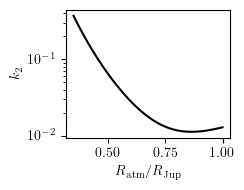

In [10]:
fig, ax = plt.subplots(figsize=(2.5,2))
ax.plot(atmosphere_radii/R_jupiter, k2_values1, color="black")
ax.set_xlabel(r"$R_\mathrm{atm}/R_\mathrm{Jup}$")
ax.set_ylabel(r"$k_2$")
#points = np.array([atmosphere_radii/R_jupiter, k2_values]).T.reshape(-1, 1, 2)
#segments = np.concatenate([points[:-1], points[1:]], axis=1)
#lc = plt.matplotlib.collections.LineCollection(segments, cmap=cmap, norm=norm)
#lc.set_array(atmosphere_radii)
#lc.set_linewidth(2)
#ax.add_collection(lc)
ax.set_yscale("log")
fig.tight_layout()
fig.savefig("figures/k2_vs_atm_radius_solid_core.png", dpi=300)
plt.show()

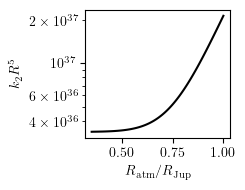

In [12]:
fig, ax = plt.subplots(figsize=(2.5,2))
ax.plot(atmosphere_radii/R_jupiter, atmosphere_radii**5*k2_values1, color="black")
ax.set_xlabel(r"$R_\mathrm{atm}/R_\mathrm{Jup}$")
ax.set_ylabel(r"$k_2R^5$")
#points = np.array([atmosphere_radii/R_jupiter, k2_values]).T.reshape(-1, 1, 2)
#segments = np.concatenate([points[:-1], points[1:]], axis=1)
#lc = plt.matplotlib.collections.LineCollection(segments, cmap=cmap, norm=norm)
#lc.set_array(atmosphere_radii)
#lc.set_linewidth(2)
#ax.add_collection(lc)
ax.set_yscale("log")
fig.tight_layout()
fig.savefig("figures/k2R5_vs_atm_radius_solid_core.png", dpi=300)
plt.show()

In [ ]:
t,k = read_output(data_file="outputs2/uni_nep_k.dat")
print(k)
t_puffy,k_puffy = read_output(data_file="outputs2/uni_puf_nep_k.dat")
print(k_puffy)

[0.37253582, 1.139124, 1.5]
[0.012519505, 0.017051207, 0.019183718]


### Gaseous core + varying atmosphere

In [ ]:
N_steps = 10
atmosphere_radii = np.linspace(R_neptune, R_jupiter, N_steps)
data2 = []
for i,atm_radius in enumerate(atmosphere_radii):
    t,k = run_alma(radii = [atm_radius, R_neptune],
                   densities = [rho_air, rho_neptune],
                   rigidities = [1e-7,1e-7],
                   viscosities = [3e-5,3e-5],
                   model_types = ["newton", "newton"],
                   show_start_stop = False)
    
    data2.append({"radius": atm_radius,
                 "t": t,
                 "k": k})

    print(f"{(i+1)/N_steps*100:.0f}% done")

10% done
20% done
30% done
40% done
50% done
60% done
70% done
80% done
90% done
100% done


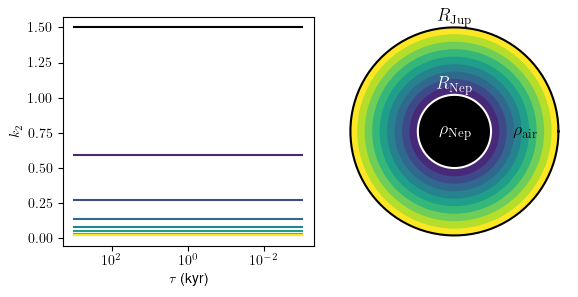

In [ ]:
# Setup colormap
norm = mcolors.Normalize(vmin=R_neptune, vmax=R_jupiter)
cmap = cm.viridis  # You can change this to any Matplotlib colormap
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, axes = plt.subplots(figsize=(6,3), ncols=2)
for i, model in enumerate(data2):
    color = cmap(norm(model["radius"]))
    if i == 0: color = "black"
    # Plot love number
    axes[0].plot(model["t"],model["k"], color=color, label=f"$R={model["radius"]/R_jupiter:.2f}$"+ r"$R_\mathrm{Jup}$")

    # Show circle of radius`
    circle = plt.Circle((0,0),model["radius"]/R_jupiter, color=color, zorder=(len(data)-i)/10)
    axes[1].add_patch(circle)

axes[0].set_xscale("log")
axes[0].xaxis.set_inverted(True)
axes[0].set_xlabel(r"$\tau$ (kyr)")
axes[0].set_ylabel(r"$k_2$")

lims = 1.1
axes[1].set_xlim(-lims,lims)
axes[1].set_ylim(-lims,lims)
axes[1].set_aspect("equal")
axes[1].axis("off")

# Plot core
circle = plt.Circle((0,0),R_neptune/R_jupiter, color="black",zorder=10)
axes[1].add_patch(circle)

# Plot boundaries
phi = np.linspace(0,2*np.pi,100)
axes[1].plot(R_neptune/R_jupiter*np.cos(phi), R_neptune/R_jupiter*np.sin(phi), zorder=11, color='white')
axes[1].text(0, R_neptune/R_jupiter, r"$R_\mathrm{Nep}$", fontsize=13, ha="center", va="bottom", color="white")
axes[1].plot(np.cos(phi), np.sin(phi), color="black")
axes[1].text(0, 1, r"$R_\mathrm{Jup}$", fontsize=13, ha="center", va="bottom", color="black")
axes[1].text(0, 0, r"$\rho_\mathrm{Nep}$", fontsize=13, ha="center", va="center", zorder=12, color="white")
axes[1].text((R_neptune/R_jupiter+1)/2, 0, r"$\rho_\mathrm{air}$", fontsize=13, ha="center", va="center", zorder=12, color="black")

fig.tight_layout()
fig.savefig("figures/varying_atmosphere_gaseous_core.png", dpi=300)
plt.show()

In [ ]:
change_param("time_points_minus_one", 2)

N_steps = 100
atmosphere_radii = np.linspace(R_neptune, R_jupiter, N_steps)
data_R2 = []
k2_values2 = np.zeros(N_steps)
for i,atm_radius in enumerate(atmosphere_radii):
    t,k = run_alma(radii = [atm_radius, R_neptune],
                   densities = [rho_air, rho_neptune],
                   rigidities = [1e-7,1e-7],
                   viscosities = [3e-5,3e-5],
                   model_types = ["newton", "newton"],
                   show_start_stop = False)
    
    data_R2.append({"radius": atm_radius,
                 "t": t,
                 "k": k})
    k2_values2[i] = k[0]
    print(f"{i/N_steps*100:.0f}% done")

change_param("time_points_minus_one", 100)

0% done
1% done
2% done
3% done
4% done
5% done
6% done
7% done
8% done
9% done
10% done
11% done
12% done
13% done
14% done
15% done
16% done
17% done
18% done
19% done
20% done
21% done
22% done
23% done
24% done
25% done
26% done
27% done
28% done
29% done
30% done
31% done
32% done
33% done
34% done
35% done
36% done
37% done
38% done
39% done
40% done
41% done
42% done
43% done
44% done
45% done
46% done
47% done
48% done
49% done
50% done
51% done
52% done
53% done
54% done
55% done
56% done
57% done
58% done
59% done
60% done
61% done
62% done
63% done
64% done
65% done
66% done
67% done
68% done
69% done
70% done
71% done
72% done
73% done
74% done
75% done
76% done
77% done
78% done
79% done
80% done
81% done
82% done
83% done
84% done
85% done
86% done
87% done
88% done
89% done
90% done
91% done
92% done
93% done
94% done
95% done
96% done
97% done
98% done
99% done


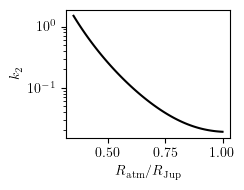

In [ ]:
fig, ax = plt.subplots(figsize=(2.5,2))
ax.plot(atmosphere_radii/R_jupiter, k2_values2, color="black")
ax.set_xlabel(r"$R_\mathrm{atm}/R_\mathrm{Jup}$")
ax.set_ylabel(r"$k_2$")
ax.set_yscale("log")
fig.tight_layout()
fig.savefig("figures/k2_vs_atm_radius_gaseous_core.png", dpi=300)
plt.show()

### Gasesous core, varying core radius
Instead of atmosphere size, keeping total planet the same size

In [ ]:
change_param("time_points_minus_one", 2)

N_steps = 100
core_radii = np.linspace(R_neptune, R_jupiter, N_steps)
data_R3 = []
k2_values3 = np.zeros(N_steps)
for i,core_radius in enumerate(core_radii):
    t,k = run_alma(radii = [R_jupiter, core_radius],
                   densities = [rho_air, rho_neptune],
                   rigidities = [1e-7,1e-7],
                   viscosities = [3e-5,3e-5],
                   model_types = ["newton", "newton"],
                   show_start_stop = False)
    
    data_R3.append({"radius": atm_radius,
                 "t": t,
                 "k": k})
    k2_values3[i] = k[0]
    print(f"{i/N_steps*100:.0f}% done")

change_param("time_points_minus_one", 100)

0% done
1% done
2% done
3% done
4% done
5% done
6% done
7% done
8% done
9% done
10% done
11% done
12% done
13% done
14% done
15% done
16% done
17% done
18% done
19% done
20% done
21% done
22% done
23% done
24% done
25% done
26% done
27% done
28% done
29% done
30% done
31% done
32% done
33% done
34% done
35% done
36% done
37% done
38% done
39% done
40% done
41% done
42% done
43% done
44% done
45% done
46% done
47% done
48% done
49% done
50% done
51% done
52% done
53% done
54% done
55% done
56% done
57% done
58% done
59% done
60% done
61% done
62% done
63% done
64% done
65% done
66% done
67% done
68% done
69% done
70% done
71% done
72% done
73% done
74% done
75% done
76% done
77% done
78% done
79% done
80% done
81% done
82% done
83% done
84% done
85% done
86% done
87% done
88% done
89% done
90% done
91% done
92% done
93% done
94% done
95% done
96% done
97% done
98% done
99% done


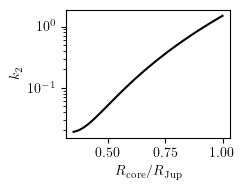

In [ ]:
fig, ax = plt.subplots(figsize=(2.5,2))
ax.plot(core_radii/R_jupiter, k2_values3, color="black")
ax.set_xlabel(r"$R_\mathrm{core}/R_\mathrm{Jup}$")
ax.set_ylabel(r"$k_2$")
ax.set_yscale("log")
fig.tight_layout()
fig.savefig("figures/k2_vs_core_radius_gaseous_core.png", dpi=300)
plt.show()